# <center> Ketimpangan Pendidikan Penduduk Antar Kelurahan di Kota Bandung Menggunakan Metode K-Means </center>

# Library Requirement

Library yang digunakan mencakup pengolahan data (pandas, numpy), visualisasi (matplotlib, seaborn), serta metode clustering K-Means dan evaluasinya.

In [1]:
# for data preparation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Data Preparation

## 1. Loading Dataset

Dataset berisi jumlah penduduk Kota Bandung berdasarkan jenjang pendidikan per kelurahan dan tahun. Data ini menjadi dasar analisis ketimpangan pendidikan antar wilayah.

In [2]:
df = pd.read_csv('jumlah_penduduk_kota_bandung_berdasarkan_jenis_pendidikan_2(1).csv')
df

,id,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,jenis_pendidikan,jumlah_penduduk,satuan,semester,tahun
0,1,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250002,SUKARASA,32.73.01,SUKASARI,32.73.01.1001,SUKARASA,TIDAK/BELUM SEKOLAH,1955,ORANG,1,2017
1,2,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250002,SUKARASA,32.73.01,SUKASARI,32.73.01.1001,SUKARASA,BELUM TAMAT SD,1109,ORANG,1,2017
2,3,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250002,SUKARASA,32.73.01,SUKASARI,32.73.01.1001,SUKARASA,TAMAT SD/SEDERAJAT,2132,ORANG,1,2017
3,4,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250002,SUKARASA,32.73.01,SUKASARI,32.73.01.1001,SUKARASA,SLTP/SEDERAJAT,1549,ORANG,1,2017
4,5,32,JAWA BARAT,3273,KOTA BANDUNG,3273250,SUKASARI,3273250002,SUKARASA,32.73.01,SUKASARI,32.73.01.1001,SUKARASA,SLTA/SEDERAJAT,3374,ORANG,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25665,25666,32,JAWA BARAT,3273,KOTA BANDUNG,3273100,RANCASARI,3273100006,MEKARJAYA,327323,RANCASARI,32.73.23.1004,MEKARMULYA,DIPLOMA I/II,255,ORANG,1,2025
25666,25667,32,JAWA BARAT,3273,KOTA BANDUNG,3273100,RANCASARI,3273100006,MEKARJAYA,327323,RANCASARI,32.73.23.1004,MEKARMULYA,AKADEMI/DIPL.III/S.MUDA,1195,ORANG,1,2025
25667,25668,32,JAWA BARAT,3273,KOTA BANDUNG,3273100,RANCASARI,3273100006,MEKARJAYA,327323,RANCASARI,32.73.23.1004,MEKARMULYA,DIPLOMA IV/STRATA I,3292,ORANG,1,2025
25668,25669,32,JAWA BARAT,3273,KOTA BANDUNG,3273100,RANCASARI,3273100006,MEKARJAYA,327323,RANCASARI,32.73.23.1004,MEKARMULYA,STRATA-II,380,ORANG,1,2025


## 2. Cek Jenis Pendidikan

Pengecekan dilakukan untuk memastikan seluruh kategori pendidikan tercatat dengan lengkap.

In [3]:
df['jenis_pendidikan'].value_counts()

jenis_pendidikan
SLTP/SEDERAJAT              2567
TAMAT SD/SEDERAJAT          2567
DIPLOMA IV/STRATA I         2567
SLTA/SEDERAJAT              2567
TIDAK/BELUM SEKOLAH         2265
BELUM TAMAT SD              2265
DIPLOMA I & II              2265
DIPLOMA III                 2265
STRATA 2                    2265
STRATA 3                    2265
TIDAK/BLM SEKOLAH            302
BELUM TAMAT SD/SEDERAJAT     302
DIPLOMA I/II                 302
AKADEMI/DIPL.III/S.MUDA      302
STRATA-II                    302
STRATA-III                   302
Name: count, dtype: int64

## 3. Standardisasi Jenis Pendidikan

`Tujuan:` Beberapa label pendidikan diseragamkan agar konsisten dan mudah dianalisis. Langkah ini penting untuk menghindari duplikasi kategori saat agregasi data.

In [4]:
df['jenis_pendidikan'] = df['jenis_pendidikan'].replace({
    'TIDAK/BLM SEKOLAH': 'TIDAK/BELUM SEKOLAH',
    'BELUM TAMAT SD': 'BELUM TAMAT SD/SEDERAJAT',
    'DIPLOMA I/II': 'DIPLOMA I & II',
    'AKADEMI/DIPL.III/S.MUDA': 'DIPLOMA III',
    'STRATA-II': 'STRATA 2',
    'STRATA-III': 'STRATA 3'
})

In [5]:
df['jenis_pendidikan'].value_counts()

jenis_pendidikan
TIDAK/BELUM SEKOLAH         2567
BELUM TAMAT SD/SEDERAJAT    2567
TAMAT SD/SEDERAJAT          2567
SLTP/SEDERAJAT              2567
SLTA/SEDERAJAT              2567
DIPLOMA I & II              2567
DIPLOMA III                 2567
DIPLOMA IV/STRATA I         2567
STRATA 2                    2567
STRATA 3                    2567
Name: count, dtype: int64

## 4. Pivoting Dataset

Data diubah ke format pivot sehingga setiap kelurahan memiliki total penduduk untuk tiap jenjang pendidikan. Format ini memudahkan perbandingan antar kelurahan.

In [6]:
# menampilkan dataset (yang sudah di-aggregat) dalam bentuk pivot > agar lebih nyaman dilihat
df_pivot = df.pivot_table(
    index="bps_desa_kelurahan",
    columns="jenis_pendidikan",
    values="jumlah_penduduk",
    aggfunc="sum",
    fill_value=0,
    # margins=True,             # <-- nambahin grand total
    # margins_name="Grand Total" # <-- nama baris/kolom total
)

df_pivot.columns = [f"total_{col}" for col in df_pivot.columns]
# Baru reset index
df_pivot = df_pivot.reset_index()
df_pivot

,bps_desa_kelurahan,total_BELUM TAMAT SD/SEDERAJAT,total_DIPLOMA I & II,total_DIPLOMA III,total_DIPLOMA IV/STRATA I,total_SLTA/SEDERAJAT,total_SLTP/SEDERAJAT,total_STRATA 2,total_STRATA 3,total_TAMAT SD/SEDERAJAT,total_TIDAK/BELUM SEKOLAH
0,ANCOL,16662,1922,11941,38559,62867,19733,4492,502,13465,27887
1,ANTAPANI KIDUL,32596,6977,29389,93787,124291,36590,14482,1636,24083,69387
2,ANTAPANI KULON,15760,2025,8492,28029,54203,22611,5269,675,18723,31467
3,ANTAPANI TENGAH,32180,6964,26609,76878,113624,37644,9244,1032,30036,70369
4,ANTAPANI WETAN,29452,3974,14638,47347,97397,38308,8302,776,29242,56345
...,...,...,...,...,...,...,...,...,...,...,...
146,SUKAWARNA,24670,2912,9198,26432,70456,30471,3907,515,34632,39836
147,TAMAN SARI,35172,4933,15628,36837,148836,45330,4413,829,34922,58312
148,TURANGGA,24642,3838,17234,66700,62802,21947,14461,2110,11809,33936
149,WARUNG MUNCANG,41436,2536,5672,13967,98651,63565,982,242,70132,64982


## 5. Pengelompokan Tingkat Pendidikan

Jenjang pendidikan dikelompokkan menjadi:

- Pendidikan rendah
- Pendidikan menengah
- Pendidikan tinggi

Selanjutnya, setiap kelompok dikonversi ke bentuk persentase agar perbandingan tidak dipengaruhi oleh perbedaan jumlah penduduk.

In [7]:
# pendidikan rendah
df_pivot['pendidikan_rendah']= (
    df_pivot["total_TAMAT SD/SEDERAJAT"] +
    df_pivot["total_BELUM TAMAT SD/SEDERAJAT"] +
    df_pivot["total_TIDAK/BELUM SEKOLAH"]
)

# pendidikan menengah
df_pivot["pendidikan_menengah"] = (
    df_pivot["total_SLTP/SEDERAJAT"] +
    df_pivot["total_SLTA/SEDERAJAT"]
)

# pendidikan tinggi
df_pivot["pendidikan_tinggi"] = (
    df_pivot["total_DIPLOMA I & II"] +
    df_pivot["total_DIPLOMA III"] +
    df_pivot["total_DIPLOMA IV/STRATA I"] +
    df_pivot["total_STRATA 2"] +
    df_pivot["total_STRATA 3"]
)

df_pivot.columns

Index(['bps_desa_kelurahan', 'total_BELUM TAMAT SD/SEDERAJAT',
       'total_DIPLOMA I & II', 'total_DIPLOMA III',
       'total_DIPLOMA IV/STRATA I', 'total_SLTA/SEDERAJAT',
       'total_SLTP/SEDERAJAT', 'total_STRATA 2', 'total_STRATA 3',
       'total_TAMAT SD/SEDERAJAT', 'total_TIDAK/BELUM SEKOLAH',
       'pendidikan_rendah', 'pendidikan_menengah', 'pendidikan_tinggi'],
      dtype='object')

In [8]:
# Total penduduk per kelurahan (berdasarkan pendidikan)
df_pivot["total_pendidikan"] = (
    df_pivot["pendidikan_rendah"] +
    df_pivot["pendidikan_menengah"] +
    df_pivot["pendidikan_tinggi"]
)

# Konversi ke persentase
df_pivot["rendah_pct"] = df_pivot["pendidikan_rendah"] / df_pivot["total_pendidikan"]
df_pivot["menengah_pct"] = df_pivot["pendidikan_menengah"] / df_pivot["total_pendidikan"]
df_pivot["tinggi_pct"] = df_pivot["pendidikan_tinggi"] / df_pivot["total_pendidikan"]

df_pivot.columns


Index(['bps_desa_kelurahan', 'total_BELUM TAMAT SD/SEDERAJAT',
       'total_DIPLOMA I & II', 'total_DIPLOMA III',
       'total_DIPLOMA IV/STRATA I', 'total_SLTA/SEDERAJAT',
       'total_SLTP/SEDERAJAT', 'total_STRATA 2', 'total_STRATA 3',
       'total_TAMAT SD/SEDERAJAT', 'total_TIDAK/BELUM SEKOLAH',
       'pendidikan_rendah', 'pendidikan_menengah', 'pendidikan_tinggi',
       'total_pendidikan', 'rendah_pct', 'menengah_pct', 'tinggi_pct'],
      dtype='object')

In [9]:
df_pivot.to_csv("data pivot.csv")

# EDA (Before Clustering)


**seberapa timpang struktur pendidikan antar kelurahan dan seberapa ekstrem perbedaannya.**
EDA membantu memastikan bahwa pola ketimpangan memang ada dan layak untuk dikelompokkan.

## Line Plot – Top 10 Pendidikan Rendah Tertinggi

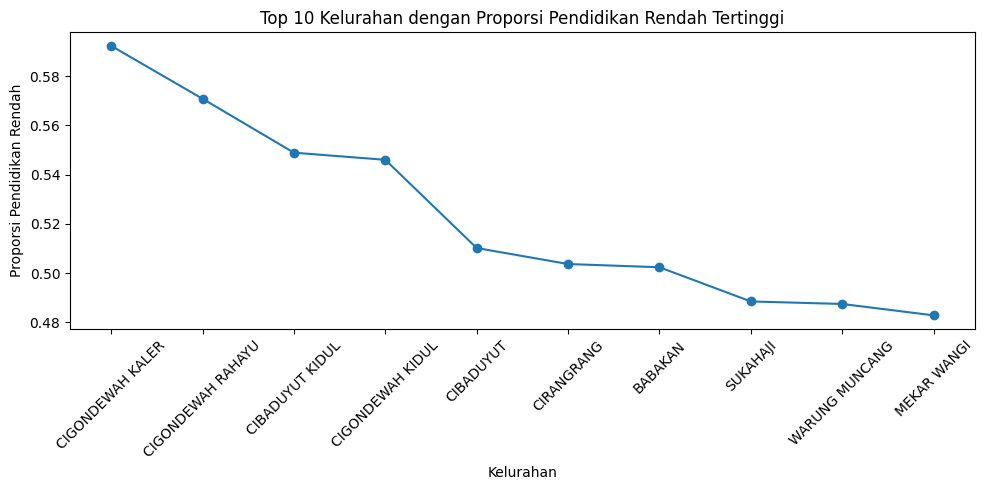

In [10]:
# Ambil Top 10 pendidikan rendah tertinggi
top10_rendah = df_pivot.sort_values(
    by="rendah_pct",
    ascending=False
).head(10)

plt.figure(figsize=(10,5))
plt.plot(top10_rendah["bps_desa_kelurahan"], top10_rendah["rendah_pct"], marker="o")
plt.xticks(rotation=45)
plt.title("Top 10 Kelurahan dengan Proporsi Pendidikan Rendah Tertinggi")
plt.xlabel("Kelurahan")
plt.ylabel("Proporsi Pendidikan Rendah")
plt.tight_layout()
plt.show()



Menampilkan kelurahan dengan proporsi pendidikan rendah paling tinggi.
Visualisasi ini menunjukkan wilayah dengan kondisi pendidikan paling tertinggal.

## Line Plot – Top 10 Pendidikan Tinggi Tertinggi

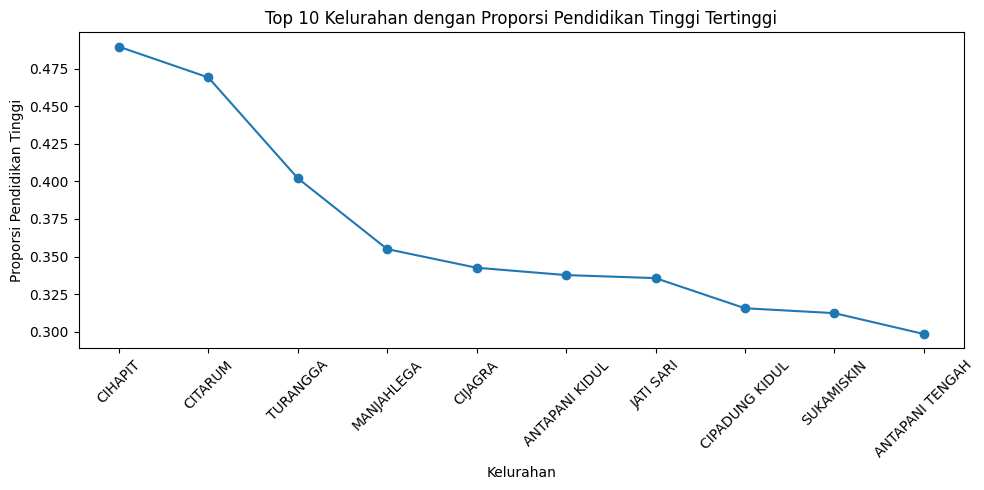

In [11]:
# Ambil Top 10 pendidikan tinggi tertinggi
top10_tinggi = df_pivot.sort_values(
    by="tinggi_pct",
    ascending=False
).head(10)

plt.figure(figsize=(10,5))
plt.plot(top10_tinggi["bps_desa_kelurahan"], top10_tinggi["tinggi_pct"], marker="o")
plt.xticks(rotation=45)
plt.title("Top 10 Kelurahan dengan Proporsi Pendidikan Tinggi Tertinggi")
plt.xlabel("Kelurahan")
plt.ylabel("Proporsi Pendidikan Tinggi")
plt.tight_layout()
plt.show()



Menampilkan kelurahan dengan proporsi pendidikan tinggi paling besar.
Kelurahan ini mencerminkan wilayah dengan capaian pendidikan yang relatif lebih baik.

## Box Plot – Pendidikan Rendah vs Tinggi

Tujuan: Digunakan untuk melihat sebaran dan outlier ketimpangan pendidikan antar kelurahan.

C:\Users\isan\AppData\Local\Temp\ipykernel_14980\3068845963.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


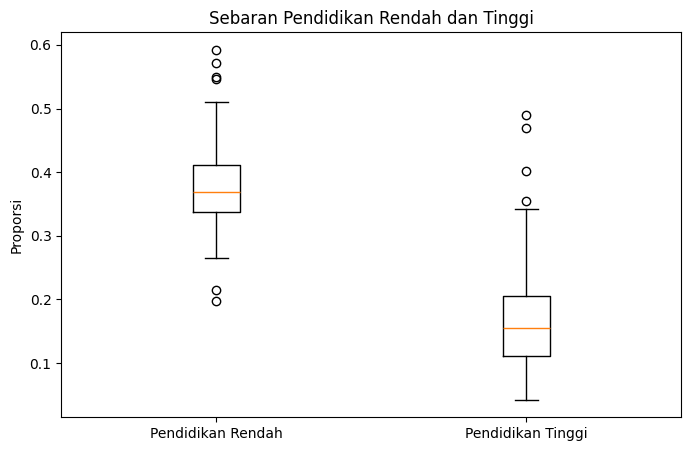

In [12]:
plt.figure(figsize=(8,5))
plt.boxplot(
    [df_pivot["rendah_pct"], df_pivot["tinggi_pct"]],
    labels=["Pendidikan Rendah", "Pendidikan Tinggi"]
)
plt.title("Sebaran Pendidikan Rendah dan Tinggi")
plt.ylabel("Proporsi")
plt.show()

## Box Plot – Struktur Pendidikan Lengkap

Tujuan: Menunjukkan posisi pendidikan menengah sebagai kelompok transisi antara pendidikan rendah dan tinggi.

C:\Users\isan\AppData\Local\Temp\ipykernel_14980\4237988957.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_pivot["menengah_pct"], labels=["Pendidikan Menengah"])


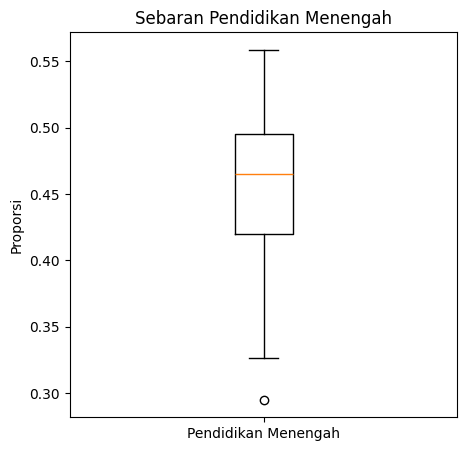

In [13]:
plt.figure(figsize=(5,5))
plt.boxplot(df_pivot["menengah_pct"], labels=["Pendidikan Menengah"])
plt.title("Sebaran Pendidikan Menengah")
plt.ylabel("Proporsi")
plt.show()

Box Plot 4 — Perbandingan Rendah–Menengah–Tinggi

C:\Users\isan\AppData\Local\Temp\ipykernel_14980\3059683809.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


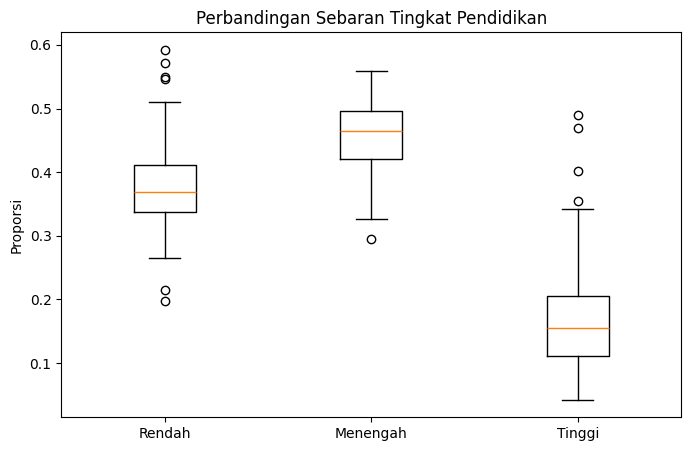

In [14]:
plt.figure(figsize=(8,5))
plt.boxplot(
    [df_pivot["rendah_pct"], df_pivot["menengah_pct"], df_pivot["tinggi_pct"]],
    labels=["Rendah", "Menengah", "Tinggi"]
)
plt.title("Perbandingan Sebaran Tingkat Pendidikan")
plt.ylabel("Proporsi")
plt.show()


## Scatter Plot

Tujuan: Memvisualisasikan hubungan antara pendidikan rendah dan tinggi.

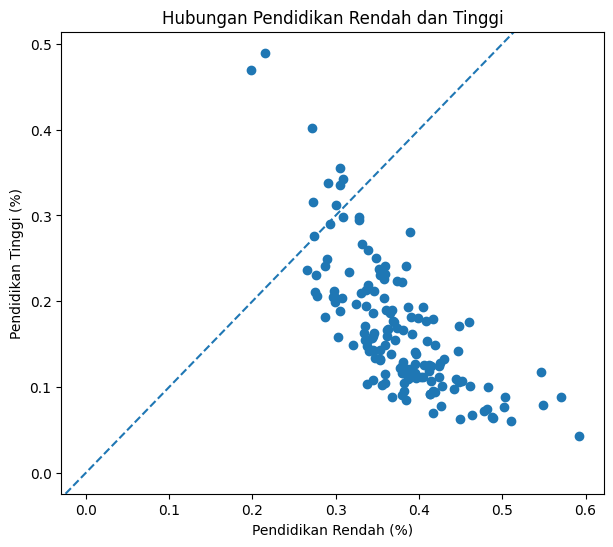

In [15]:
plt.figure(figsize=(7,6))
plt.scatter(df_pivot["rendah_pct"], df_pivot["tinggi_pct"])
plt.xlabel("Pendidikan Rendah (%)")
plt.ylabel("Pendidikan Tinggi (%)")
plt.title("Hubungan Pendidikan Rendah dan Tinggi")
plt.axline((0,0), slope=1, linestyle="--")
plt.show()


Berdasarkan hasil visualisasi scatter plot, terlihat adanya hubungan negatif yang kuat antara proporsi penduduk berpendidikan rendah dan tinggi antar kelurahan. Sebagian besar titik data berada jauh dari garis diagonal dan membentuk pola menurun, yang menunjukkan bahwa kelurahan dengan proporsi pendidikan rendah yang tinggi cenderung memiliki proporsi pendidikan tinggi yang rendah, dan sebaliknya. Pola ini mengindikasikan adanya ketimpangan pendidikan yang jelas antar kelurahan di Kota Bandung.

## Correlation Matrix

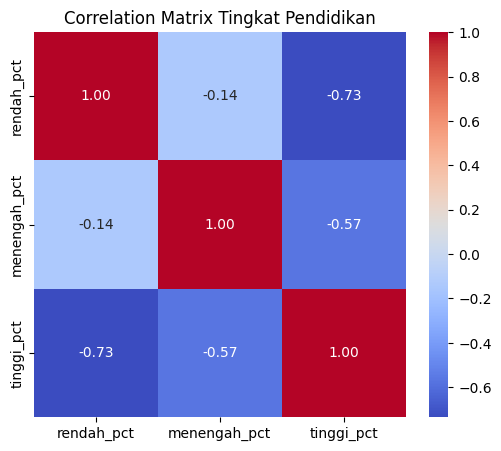

In [16]:
corr = df_pivot[["rendah_pct", "menengah_pct", "tinggi_pct"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Tingkat Pendidikan")
plt.show()


Interpretasi Correlation Matrix

> Hasil korelasi memperkuat temuan EDA bahwa pendidikan rendah dan tinggi memiliki hubungan negatif yang kuat, sementara pendidikan menengah berperan sebagai penyeimbang.

Key Findings:`

> Berdasarkan hasil EDA, terlihat bahwa ketimpangan pendidikan antar kelurahan di Kota Bandung bersifat nyata, bervariasi, dan tidak merata. Setiap kelurahan menunjukkan struktur pendidikan yang berbeda, mulai dari dominasi pendidikan rendah hingga pendidikan tinggi. Pola ketimpangan ini sulit dianalisis secara individual, sehingga diperlukan pendekatan pengelompokan untuk mengidentifikasi kesamaan karakteristik antar kelurahan. Oleh karena itu, metode clustering K-Means digunakan untuk mengelompokkan kelurahan berdasarkan pola ketimpangan pendidikan yang serupa.

# Preprocessing

Analisis _clustering_ dilakukan menggunakan variabel proporsi pendidikan rendah, menengah, dan tinggi.

Clustering dilakukan menggunakan proporsi pendidikan rendah, menengah, dan tinggi agar fokus pada struktur pendidikan, bukan jumlah penduduk.

## Pemilihan Fitur

Alasan Pemilihan 3 Fitur Untuk Clustering (`'rendah_pct', 'menengah_pct', 'tinggi_pct'`) dengan `bps_desa_kelurahan` sebagai index kolomnya

Tiga variabel persentase dipilih karena paling relevan untuk menggambarkan ketimpangan pendidikan antar kelurahan.

In [17]:
dfp = df_pivot[['bps_desa_kelurahan','rendah_pct', 'menengah_pct', 'tinggi_pct']]
dfp = dfp.set_index('bps_desa_kelurahan')

# Menyimpan dataset final ke csv
dfp.to_csv('dataset_final.csv')
dfp

,rendah_pct,menengah_pct,tinggi_pct
bps_desa_kelurahan,,,
ANCOL,0.292956,0.417109,0.289936
ANTAPANI KIDUL,0.290999,0.371363,0.337638
ANTAPANI KULON,0.352195,0.410213,0.237592
ANTAPANI TENGAH,0.327710,0.373889,0.298401
ANTAPANI WETAN,0.353118,0.416553,0.230330
...,...,...,...
SUKAWARNA,0.407927,0.415288,0.176785
TAMAN SARI,0.333339,0.504050,0.162612
TURANGGA,0.271263,0.326612,0.402125


## Deteksi Outlier

In [18]:
# Deteksi outlier dengan metode IQR
features = ["rendah_pct", "menengah_pct", "tinggi_pct"]

Q1 = dfp[features].quantile(0.25)
Q3 = dfp[features].quantile(0.75)
IQR = Q3 - Q1

outlier = (dfp[features] < (Q1 - 1.5 * IQR)) | \
          (dfp[features] > (Q3 + 1.5 * IQR))

outlier_count = outlier.sum()
total_kelurahan = dfp.shape[0]

# Tampilkan jumlah dan persentase outlier
for col in features:
    persen = (outlier_count[col] / total_kelurahan) * 100
    print(f"{col}: {outlier_count[col]} / {total_kelurahan} ≈ {persen:.1f}% → sangat kecil")


rendah_pct: 6 / 151 ≈ 4.0% → sangat kecil
menengah_pct: 1 / 151 ≈ 0.7% → sangat kecil
tinggi_pct: 4 / 151 ≈ 2.6% → sangat kecil


Metode IQR menunjukkan jumlah outlier sangat kecil `(< 5%)` dan tidak mendistorsi proses clustering. Outlier tetap dipertahankan karena merepresentasikan kondisi ketimpangan ekstrem.

## Scaling

> Disini, kami menggunakan metode __StandardScaler__ karena clustering menggunakan K-Means sangat sensitif terhadap perbedaan skala data.

In [19]:
X = dfp.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X

,rendah_pct,menengah_pct,tinggi_pct
bps_desa_kelurahan,,,
ANCOL,0.292956,0.417109,0.289936
ANTAPANI KIDUL,0.290999,0.371363,0.337638
ANTAPANI KULON,0.352195,0.410213,0.237592
ANTAPANI TENGAH,0.327710,0.373889,0.298401
ANTAPANI WETAN,0.353118,0.416553,0.230330
...,...,...,...
SUKAWARNA,0.407927,0.415288,0.176785
TAMAN SARI,0.333339,0.504050,0.162612
TURANGGA,0.271263,0.326612,0.402125


# K-Means Clustering

## 1. Penentuan Jumlah Klaster Optimal (Elbow Method)

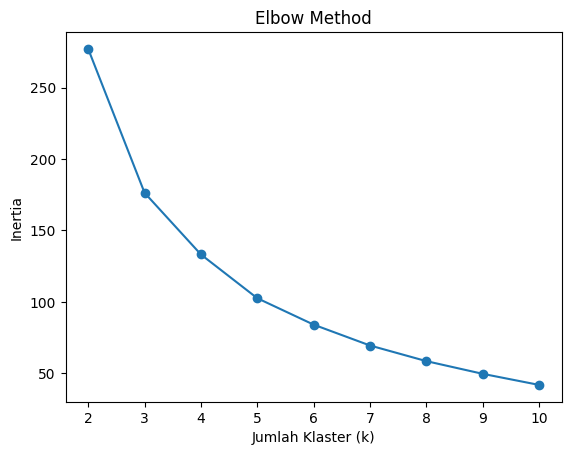

In [20]:
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

Grafik Elbow untuk melihat jumlah klaster optimal dalam kasus ini jatuh pada `k = 3`

## 2. Evaluasi Klaster

In [21]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"k={k}, silhouette={sil},  davies_bouldin={db}")

k=2, silhouette=0.4177737971235044,  davies_bouldin=0.9142656512718809
k=3, silhouette=0.3787959999242146,  davies_bouldin=0.8826704702435094
k=4, silhouette=0.33976542574089214,  davies_bouldin=0.9181729419909082
k=5, silhouette=0.3758159269861072,  davies_bouldin=0.795895465502906
k=6, silhouette=0.34267849182302607,  davies_bouldin=0.8267992435891626
k=7, silhouette=0.35635208190042766,  davies_bouldin=0.8062664008237562
k=8, silhouette=0.34785662052971417,  davies_bouldin=0.826397431556481
k=9, silhouette=0.3898960741019551,  davies_bouldin=0.7425293210589157


Silhouette Score dan Davies–Bouldin Index mengonfirmasi bahwa `k = 3` memberikan keseimbangan terbaik antara kualitas klaster dan interpretasi hasil.

## 3. Pembangunan Model dan Pelabelan

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [23]:
dfp["cluster"] = kmeans.labels_
dfp["cluster"].value_counts()

cluster
1    80
2    43
0    28
Name: count, dtype: int64

Model K-Means dibangun dengan 3 klaster dan setiap kelurahan diberi label klaster sesuai pola ketimpangannya.

## 5. Visualisasi Hasil Clustering

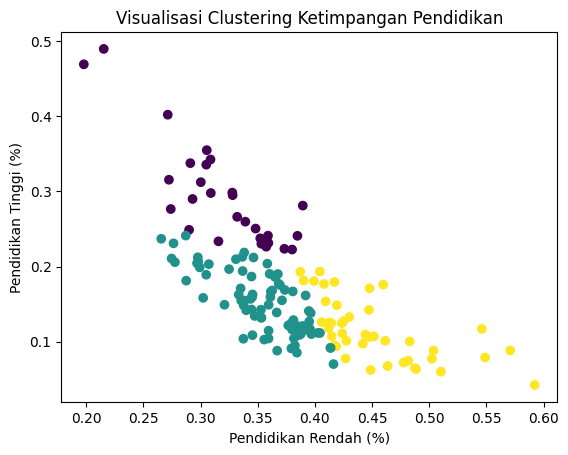

In [24]:
plt.scatter(
    dfp["rendah_pct"],
    dfp["tinggi_pct"],
    c=dfp["cluster"]
)
plt.xlabel("Pendidikan Rendah (%)")
plt.ylabel("Pendidikan Tinggi (%)")
plt.title("Visualisasi Clustering Ketimpangan Pendidikan")
plt.show()


<Figure size 640x480 with 0 Axes>

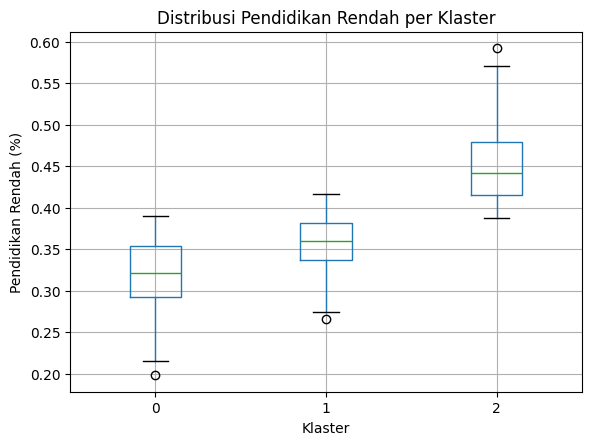

In [25]:
plt.figure()
dfp.boxplot(column="rendah_pct", by="cluster")
plt.xlabel("Klaster")
plt.ylabel("Pendidikan Rendah (%)")
plt.title("Distribusi Pendidikan Rendah per Klaster")
plt.suptitle("")
plt.show()


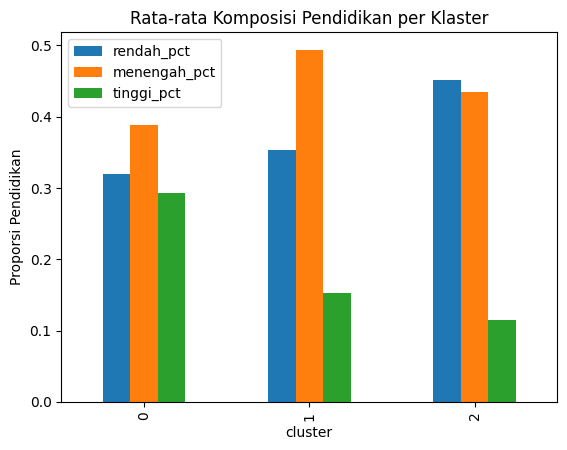

In [26]:
centroid = dfp.groupby("cluster")[["rendah_pct","menengah_pct","tinggi_pct"]].mean()

centroid.plot(kind="bar")
plt.ylabel("Proporsi Pendidikan")
plt.title("Rata-rata Komposisi Pendidikan per Klaster")
plt.show()


## 6. Interpretasi Karakteristik Klaster & Rekomendasinya

In [27]:
cluster_summary = dfp.groupby("cluster")[
    ["rendah_pct", "menengah_pct", "tinggi_pct"]
].mean()

cluster_summary


,rendah_pct,menengah_pct,tinggi_pct
cluster,,,
0,0.318976,0.387764,0.293260
1,0.353726,0.493764,0.152511
2,0.450959,0.434178,0.114863
